In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


5 Data Teratas:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Informasi Dataset:
<class 'pandas.core.

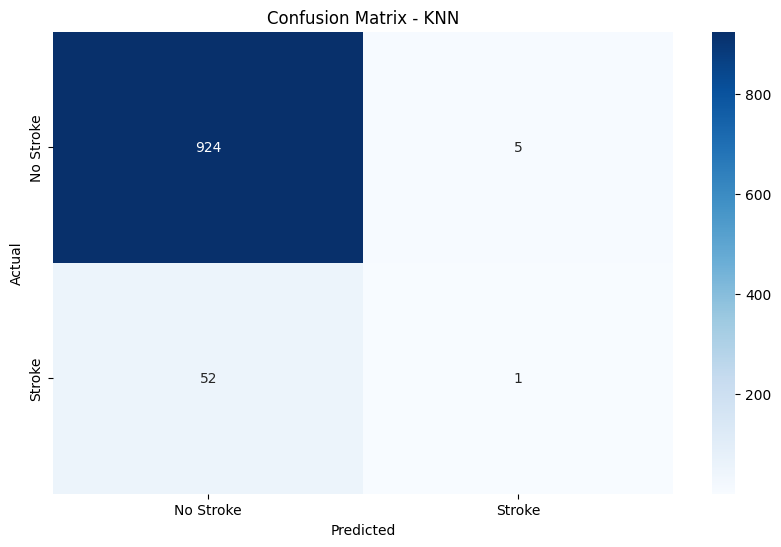

In [7]:
# 1. Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Membaca Dataset
df = pd.read_csv("sample_data/healthcare-dataset-stroke-data.csv")

# 3. Lihat Ringkasan Awal Data
print("5 Data Teratas:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())
print("\nCek nilai yang hilang:")
print(df.isnull().sum())

# 4. Preprocessing dan Encoding Data
# Hapus kolom 'id' karena tidak relevan
df.drop(columns='id', inplace=True)

# Hapus baris dengan nilai NULL (hanya kolom bmi yang punya null)
df.dropna(inplace=True)

# Encoding data kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)

# 5. Pisahkan Fitur dan Target
X = df_encoded.drop('stroke', axis=1)  # Fitur
y = df_encoded['stroke']  # Target

# 6. Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Pembagian Data (Training dan Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Training Model KNN
model = KNeighborsClassifier(n_neighbors=5)  # Menggunakan 5 tetangga terdekat
model.fit(X_train, y_train)

# 9. Prediksi dengan Data Testing
y_pred = model.predict(X_test)

# 10. Evaluasi Model
print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 11. Visualisasi dan Simpan sebagai PNG
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Simpan visualisasi sebagai PNG
plt.savefig("confusion_matrix_knn.png")

# Menampilkan pesan bahwa visualisasi telah disimpan
print("\nVisualisasi confusion matrix disimpan dalam file 'confusion_matrix_knn.png'")

# Menampilkan visualisasi (opsional)
plt.show()
